# Scikit-Learn Examples 202-05-08

In [2]:
import numpy as np 
import pandas as pd

from yellowbrick.datasets import load_concrete


from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [5]:
X, y = load_concrete()

In [6]:
X.head()

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: strength, dtype: float64

In [8]:
X.shape

(1030, 8)

In [9]:
y.shape

(1030,)

In [10]:
model = SGDRegressor()

In [11]:
model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [12]:
model.set_params(fit_intercept=False)

SGDRegressor(fit_intercept=False)

In [14]:
model.fit(X, y)

SGDRegressor(fit_intercept=False)

In [15]:
for attr in dir(model):
    if attr.endswith("_") and not attr.startswith("_"):
        print(attr)

average_coef_
average_intercept_
coef_
intercept_
n_features_in_
n_iter_
standard_coef_
standard_intercept_
t_


In [16]:
model.coef_

array([ 6.41285683e+10,  5.17675970e+11,  1.01042678e+11, -1.67068792e+11,
       -3.81750535e+10,  2.52410379e+10,  5.49619119e+10,  8.75822704e+11])

In [17]:
model.predict([[300, 130, 0, 400, 1, 500, 300, 200]])

array([2.23944388e+14])

In [26]:
model.predict(X.iloc[:10,])

array([9.53968126e+13, 9.57754282e+13, 3.49644043e+14, 4.32847200e+14,
       4.34562087e+14, 1.77154747e+14, 4.11303699e+14, 1.16151447e+14,
       1.22853739e+14, 7.30644441e+13])

In [27]:
model.score(X, y)

-8.347128989648335e+25

In [28]:
model = Ridge().fit(X, y)

In [29]:
model.score(X, y)

0.6154647342499802

In [30]:
model.predict([[300, 130, 0, 400, 1, 500, 300, 200]])


array([4.34967908])

In [31]:
y.min(), y.max()

(2.331807832, 82.5992248)

In [32]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

## UCI Machine Learning Workshop

Downloaded from [AI4I 2020 Predictive Maintenance Dataset](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset#)

In [35]:
df = pd.read_csv("../data/ai4i2020.csv", index_col='UDI')
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [82]:
# Do we have any missing data?
df.isnull().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [68]:
def extract_target(df):
    cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]
    for row in df[cols].values:
        if np.sum(row) == 1:
            yield cols[np.where(row==1)[0][0]]
        else:
            yield "NONE"
       
feature_cols = [
    "Type", 
    "Air temperature [K]", 
    "Process temperature [K]", 
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
]
    
X = df[feature_cols]
y = np.array(list(extract_target(df)))

In [71]:
X.shape

(10000, 6)

In [72]:
y.shape

(10000,)

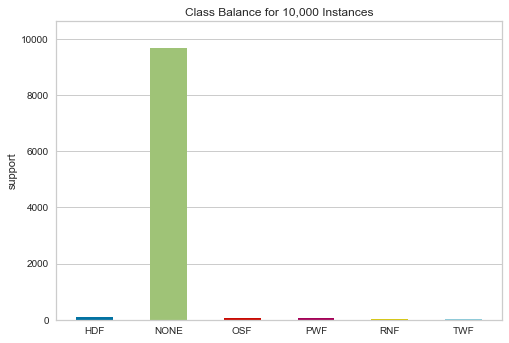

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12c2d9780>)

In [70]:
from yellowbrick.target import class_balance

class_balance(y)

In [74]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [75]:
X_train.shape, y_train.shape

((8000, 6), (8000,))

In [77]:
X_test.shape, y_test.shape

((2000, 6), (2000,))

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier

In [89]:
X.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
dtype: object

In [92]:
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_exclude=np.object)

model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
    ], remainder='drop')),
    ('clf', RandomForestClassifier()),
])

In [93]:
model.fit(X_train, y_train)

Pipeline(steps=[('columns',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12da0b128>),
                                                 ('scalar', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12da0b048>)])),
                ('clf', RandomForestClassifier())])

In [98]:
model.score(X_test, y_test)

0.98

In [102]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [103]:
scores = cross_val_score(model, X, y, cv=StratifiedKFold(12))

In [104]:
scores

array([0.97961631, 0.9736211 , 0.97721823, 0.97482014, 0.93997599,
       0.96878752, 0.96878752, 0.9819928 , 0.9759904 , 0.9759904 ,
       0.97959184, 0.9759904 ])

In [105]:
scores.mean()

0.9726985518427994

In [106]:
scores.var()

0.00011178354778567995